<h2>Importing libraries and data<h2>

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
#ensures that the graphs are displayed within the notebook 

%matplotlib inline

In [3]:
path = '/Users/bentley/Documents/Documents - Bentley I/Bentley/Portfolio/Hausverkäufe'

In [4]:
houses = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'houses_data_clean.csv'))

In [5]:
#check the dataframe 
houses.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,98074,47.6168,-122.045


In [6]:
#drop unnamed column 
houses = houses.drop(columns = ['Unnamed: 0'])

In [7]:
#check the columns 
houses.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [8]:
#check for duplicates 
houses_dups = houses[houses.duplicated()] 
houses_dups

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long


In [9]:
#check for missing values 
houses.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

In [10]:
#check for mixed datatypes 
for col in houses.columns.tolist():
  weird = (houses[[col]].applymap(type) != houses[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (houses[weird]) > 0:
    print (col)

/var/folders/_w/1ws3qx2946ld4h6lljb05b440000gn/T/ipykernel_14606/1023376670.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (houses[[col]].applymap(type) != houses[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/_w/1ws3qx2946ld4h6lljb05b440000gn/T/ipykernel_14606/1023376670.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (houses[[col]].applymap(type) != houses[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/_w/1ws3qx2946ld4h6lljb05b440000gn/T/ipykernel_14606/1023376670.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (houses[[col]].applymap(type) != houses[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/_w/1ws3qx2946ld4h6lljb05b440000gn/T/ipykernel_14606/1023376670.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (houses[[col]].applymap(type) != houses[[col]].iloc[0].app

In [11]:
#list column names 
houses.columns.to_list()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long']

In [12]:
#aggregate 
agg = {'bedrooms':'first',
      'bathrooms':'first',
      'sqft_living':'first',
      'sqft_lot':'first'}

In [13]:
#group data according to price 
houses = houses.groupby(['zipcode','price']).agg(agg)

In [14]:
houses.head()

bedrooms  bathrooms  sqft_living  sqft_lot
zipcode price                                               
98001   100000.0         2        1.0          770     17334
        110000.0         2        1.0          828      4524
        115000.0         2        1.0         1000     16524
        124500.0         2        1.0          840      6480
        132500.0         3        1.0         1080     10500

In [15]:
#convert the result to a new DataFrame
houses = pd.DataFrame(houses.reset_index())

In [17]:
#rename columns 
houses.columns = ['zipcode','price','bedrooms', 'bathrooms', 'living_sqft','lot_sqft']

In [18]:
#remove categorical columns
houses = houses.drop(columns = ['zipcode','price'])

In [19]:
#check columns in new dataframe 
houses.columns.to_list()

['bedrooms', 'bathrooms', 'living_sqft', 'lot_sqft']

Dataframe contains variables per zipcode...

<h2>Elbow Technique<h2>

In [20]:
#define a range of potential numbers of clusters in the data 
#choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [22]:
#after applying range, then apply k-means algorithm 
score = [kmeans[i].fit(houses).score(houses) for i in range(len(kmeans))]
#this will output a list of scores 

/Users/bentley/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bentley/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bentley/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bentley/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

In [23]:
#list score
score

[-31793637379380.043,
 -12006270278092.549,
 -5704761147389.16,
 -3635464122277.697,
 -2087926807718.6155,
 -1521843801540.4019,
 -1084704482969.648,
 -887017641703.3636,
 -718722131942.5453]

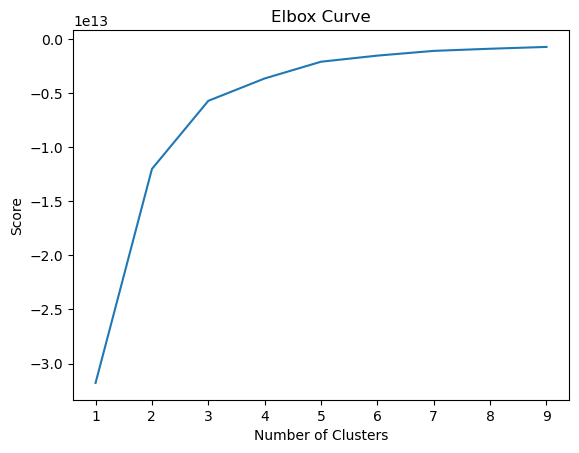

In [24]:
#plot the elbow curve 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

I will be choosing the number 4. The values jump rapidly from 1 through 4, then plateaus after 4. This means the optimal count for clusters is 4. 

<h2>K-Means Algorithm<h2>

In [25]:
#create the k-means object
kmeans = KMeans(n_clusters = 4)

In [26]:
#fit kmeans object to dataframe 
kmeans.fit(houses)

/Users/bentley/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [27]:
#create column in dataframe with values corresponding to clusters 
houses['clusters'] = kmeans.fit_predict(houses)

/Users/bentley/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
#check the dataframe to see the new column 
houses.head()

,bedrooms,bathrooms,living_sqft,lot_sqft,clusters
0,2,1.0,770,17334,0
1,2,1.0,828,4524,0
2,2,1.0,1000,16524,0
3,2,1.0,840,6480,0
4,3,1.0,1080,10500,0


In [29]:
#count the clusers 
houses['clusters'].value_counts()

clusters
0    13801
3      736
1      247
2       12
Name: count, dtype: int64

Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


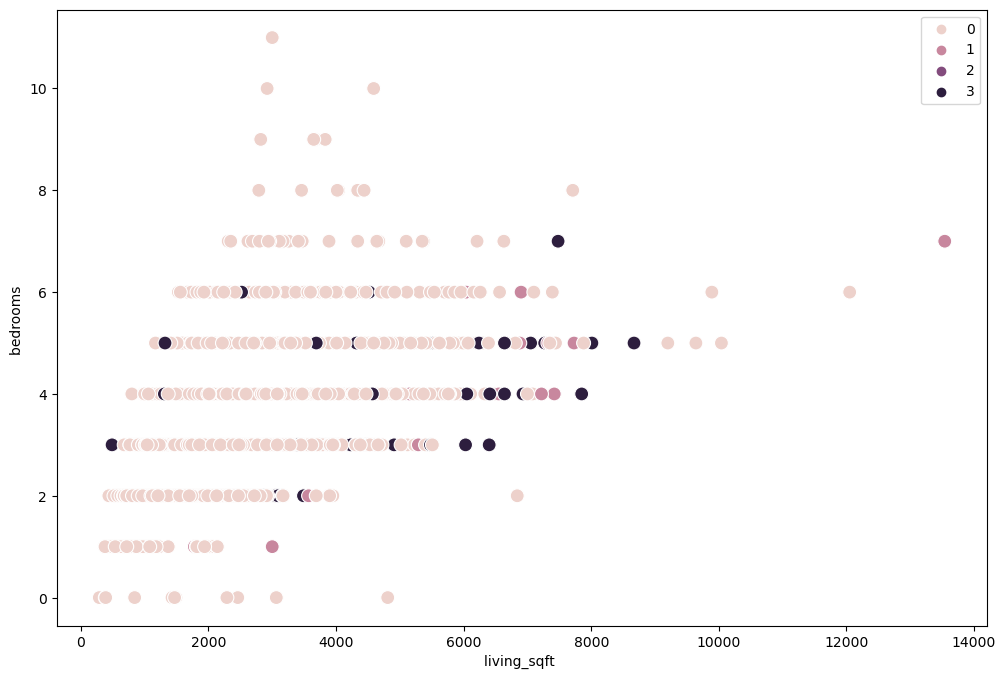

In [32]:
#plot Living Square Feet vs Bedrooms 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=houses['living_sqft'], y=houses['bedrooms'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('living_sqft ') # Label x-axis.
plt.ylabel('bedrooms ') # Label y-axis.
plt.show()

/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


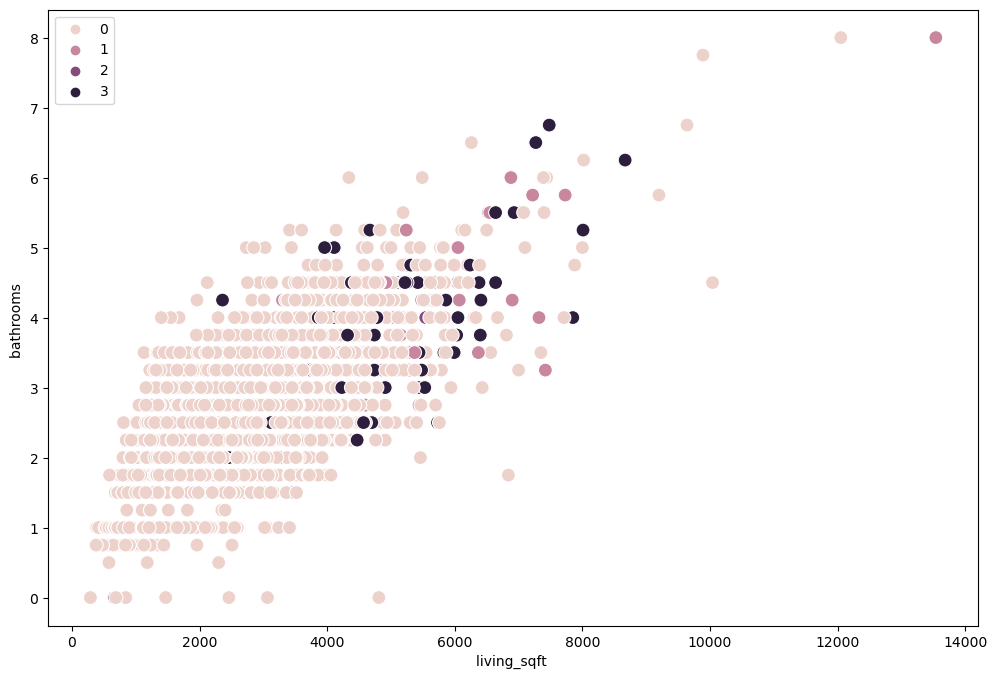

In [33]:
#plot Living Square Feet vs Bathrooms

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=houses['living_sqft'], y=houses['bathrooms'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('living_sqft ') # Label x-axis.
plt.ylabel('bathrooms ') # Label y-axis.
plt.show()

/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bentley/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


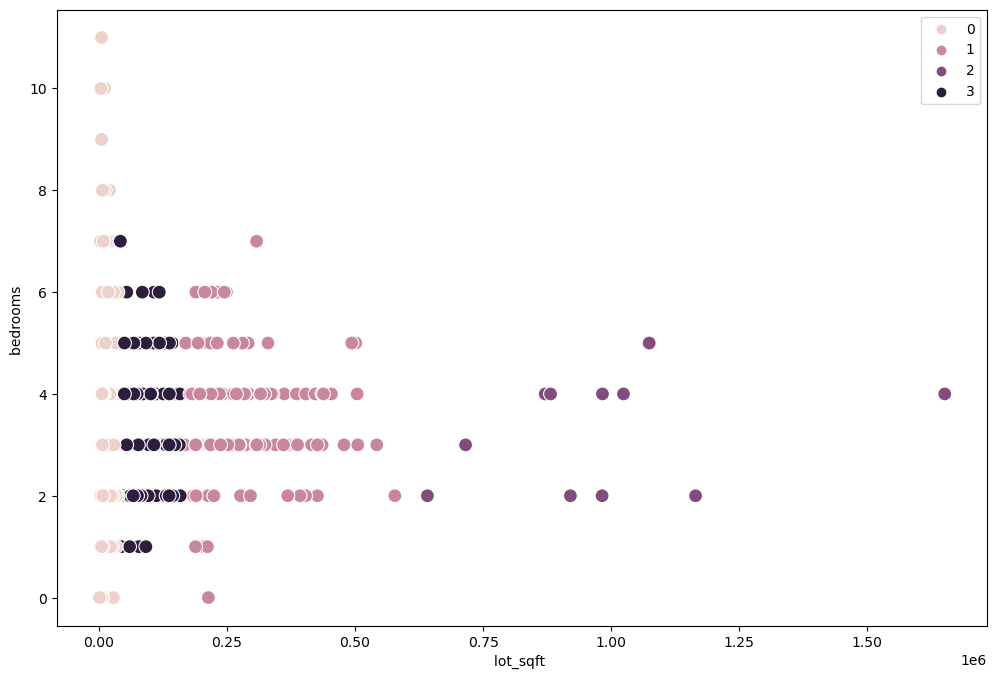

In [34]:
#plot Lot Square Feet vs Bedrooms

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=houses['lot_sqft'], y=houses['bedrooms'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('lot_sqft ') # Label x-axis.
plt.ylabel('bedrooms ') # Label y-axis.
plt.show()

There are 4 distinct clusters that were selected from the elbow technique. The first group (0) are mostly houses with small living square feet and few bedrooms and bathrooms. The second group (1) consist of houses with 3 to 5 bedrooms. The third group (2) consist of houses with 6 to 8 bedrooms. The fourth group (3) only has a few observation above 8 bedrooms. This data makes sense as there are a wide range of house price factors in America. Some houses are very small while others can have lots of living square feet as well as bedrooms and bathrooms. 

<h2>Calculate the descriptive statistics<h2>


*use the groupby() function...

In [35]:
#create a column that renames the clusters to colors 
houses.loc[houses['clusters'] == 3, 'cluster'] = 'black'
houses.loc[houses['clusters'] == 2, 'cluster'] = 'dark purple'
houses.loc[houses['clusters'] == 1, 'cluster'] = 'purple'
houses.loc[houses['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/_w/1ws3qx2946ld4h6lljb05b440000gn/T/ipykernel_14606/1611229209.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'black' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  houses.loc[houses['clusters'] == 3, 'cluster'] = 'black'


In [36]:
houses.groupby('cluster').agg({
    'living_sqft':['mean','median'],
    'bedrooms':['mean','median'],
    'bathrooms':['mean','median']
})

living_sqft          bedrooms        bathrooms       
                    mean  median      mean median      mean median
cluster                                                           
black        2805.058424  2595.0  3.480978    3.0  2.429348  2.500
dark purple  3325.416667  3390.0  3.333333    4.0  2.895833  3.125
pink         2092.765379  1930.0  3.380914    3.0  2.123669  2.250
purple       3009.805668  2750.0  3.441296    3.0  2.587045  2.500

Propose what these results could be useful for in future steps of an analytics pipeline.

It may be interesting to create a scatter plot like those above, but the color coordination comes from zipcodes. This may give insight if regions follow the cluster pattern. 